In [0]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [100]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h2>Analyze by visualizing data</h2>

In [102]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [103]:

test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Text(0, 0.5, 'Number of Survival ')

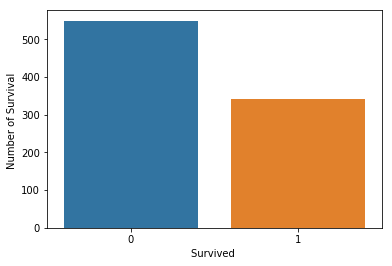

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
x = np.array(train_df['Survived'].value_counts().index)
y = np.array(train_df['Survived'].value_counts().values)
plt.figure()
sns.barplot(x,y)
plt.xlabel('Survived ')
plt.ylabel('Number of Survival ')

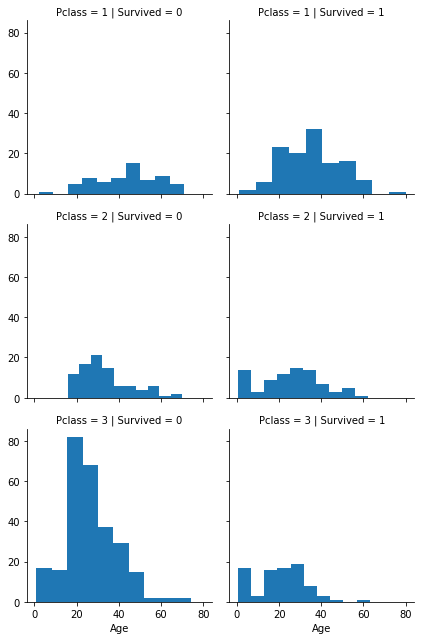

In [105]:
import matplotlib.pyplot as plt
g = sns.FacetGrid(train_df, col="Survived",  row="Pclass")
g = g.map(plt.hist, "Age")

**Observation:**

1.  More people are survived from Pclass=1 
2.  More people died from Pclass=3



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


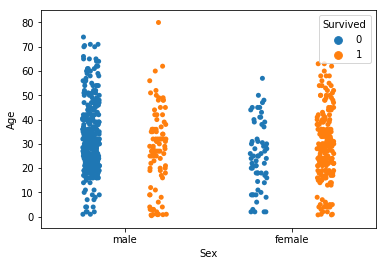

In [106]:
#https://stackabuse.com/seaborn-library-for-data-visualization-in-python-part-1/
sns.stripplot(x='Sex', y='Age', data=train_df, jitter=True, hue='Survived', split=True)

**Observation:**

1.  More female survivors then males

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:2974: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


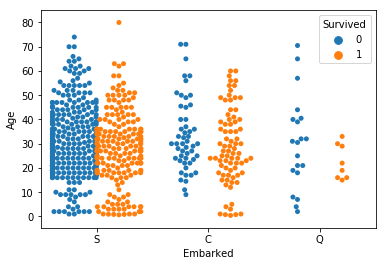

In [107]:
#https://stackabuse.com/seaborn-library-for-data-visualization-in-python-part-1/
sns.swarmplot(x='Embarked', y='Age', data=train_df, hue='Survived', split=True)

<h2>Data Prepossessing</h2>

In [108]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [0]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [0]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

In [0]:
train_df['Embarked'].replace(['S','Q','C'],[0,1,2],inplace=True)

In [0]:
test_df['Embarked'].replace(['S','Q','C'],[0,1,2],inplace=True)

In [0]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [0]:
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [0]:
train_df = train_df.dropna()

In [0]:
test_df = test_df.dropna()

In [116]:
train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,2.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [119]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((712, 7), (712,), (331, 7))

In [121]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [124]:
lracc=lr.score(X_train, Y_train)
lracc

0.8019662921348315

In [135]:
svm = SVC()
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
svmacc = svm.score(X_train, Y_train)
svmacc

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9044943820224719

In [129]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knnacc = knn.score(X_train, Y_train)
knnacc

0.8328651685393258

In [131]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
Y_pred = nb.predict(X_test)
nbacc = nb.score(X_train, Y_train)
nbacc

0.7949438202247191

In [132]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)
dtacc = dt.score(X_train, Y_train)
dtacc

0.9859550561797753

In [133]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)
rfacc = rf.score(X_train, Y_train)
rfacc

0.9859550561797753

In [136]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes',
              'Decision Tree'],
    'Score': [svmacc, knnacc, lracc, 
              rfacc, nbacc, dtacc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.985955
5,Decision Tree,0.985955
0,Support Vector Machines,0.904494
1,KNN,0.832865
2,Logistic Regression,0.801966
4,Naive Bayes,0.794944


**Observation:**

1.  Random Forest and Decision Tree performed very well

In [0]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)